<a href="https://colab.research.google.com/github/HenriqueCCdA/BC_DS_Projeto_Final/blob/main/Notebooks/ML/treinamentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# 1) Resumo

Neste notebook foram feitos os treinamentos e seleção de hyperparamentros de 6 modelos de **ML** distintos. Os modelos estudados foram:

* DummyClassifier
* LogisticRegression
* DecisionTreeClassifier
* Forest Tree
* Support Vector Machine
* KNeighbors

A busca pelos hyperparametros foram feitas pelo GridSearchCV ou pelo RandomizedSearchCV. Para a Cross Validation foi usado **RepeatedStratifiedKFold** com **5** divições de **10** repetições.

O parametro utilizado para avaliação do modelo foi **ROC_AUC** e quantidade de **falsos negativos** (FN).

A base de dados utilizados tem **351** amostras com **52** variaveis explicativas. Dessas **351** amostras **298** foram usados para **Cross Validation** (treino + teste) e **53** foram usados para a **validação**.


---
# 2) Pre-analise

---
## 2.1) Minhas Funções

In [1]:
# Maquina Local 
maquina_local = True

if (maquina_local):
    import sys
    sys.path.insert(1, "../../")

    from src.plota_graficos import plota_curva_roc, plota_matriz_de_confusao
    from src.ml import retorna_x_y, intervalo_de_confianca, treina_modelo_grid_search_cv, treina,\
                        treina_modelo_randomized_search_cv, obtem_os_resultados_SearchCV, cv_val_split, desempenho_dos_modelos,\
                        obtem_nome_modelo
    from src.info import proporcao_y, numero_teste_treino_val, resultados_treinamento, dimensao_dados, variaveis_explicativas
    import src.hyperparametros as hp
# Collab
else:
   !curl -O "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/requirements.txt"
   !pip3 install -r requirements.txt
   !curl -O "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/src/plota_graficos.py"
   !curl -O "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/src/ml.py"
   !curl -O "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/src/info.py"

   from plota_graficos import plota_curva_roc, plota_matriz_de_confusao
   from ml import retorna_x_y, intervalo_de_confianca, treina_modelo_grid_search_cv, treina,\
                        treina_modelo_randomized_search_cv, obtem_os_resultados_SearchCV, cv_val_split, desempenho_dos_modelos,\
                        obtem_nome_modelo

   from info import proporcao_y, numero_teste_treino_val, resultados_treinamento, dimensao_dados, variaveis_explicativas

---
## 2.2) Importando libs

In [2]:
import pandas as pd
#
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#
import matplotlib.pyplot as plt
#
import numpy as np
#
from scipy.stats import uniform
#
from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence
#


## 2.3) Versão dos bibilotecas

In [3]:
import sklearn as sk
import scipy   as sc
import matplotlib as mpl

print(f'scipy      : {sc.__version__}')
print(f'sklearn    : {sk.__version__}')
print(f'pandas     : {pd.__version__}')
print(f'numpy      : {np.__version__}')
print(f'matplotlib : {mpl.__version__}')

scipy      : 1.6.2
sklearn    : 0.24.2
pandas     : 1.2.4
numpy      : 1.20.2
matplotlib : 3.3.4


---
# 3) Lendo os dados

In [4]:
seed     = 1471523

In [5]:
path = "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/Dados/Tratados/dados_sem_coor_acima_do_valor_de_corte.csv"
path = "../../Dados/Tratados/dados_featurewiz.csv"
dados = pd.read_csv(path)

dimensao_dados(dados)

dados.tail(n=5)

Numero de linhas : 351 
Numero de colunas: 26 


,UREA_MAX,BE_VENOUS_MEDIAN,RESPIRATORY_RATE_DIFF_REL,IMMUNOCOMPROMISED,AGE_PERCENTIL,PCR_MEDIAN,RESPIRATORY_RATE_MIN,SAT02_VENOUS_MEDIAN,LACTATE_MIN,P02_VENOUS_MIN,...,NEUTROPHILES_MEDIAN,FFA_MAX,SODIUM_MEDIAN,ALBUMIN_MIN,POTASSIUM_MEDIAN,BLOODPRESSURE_DIASTOLIC_DIFF,TEMPERATURE_DIFF_REL,HEART_RATE_MEAN,OXYGEN_SATURATION_MAX,ICU
346,-0.860241,-1.000000,-1.0,1.0,-0.333333,-0.565974,-0.357143,0.345679,1.000000,-0.704142,...,-0.749100,1.000000,-0.428571,-0.578947,-0.629630,-1.0,-1.000000,0.339623,0.736842,1
347,-0.855422,-1.000000,-1.0,1.0,1.000000,-0.993195,-0.357143,0.345679,1.000000,-0.704142,...,-0.834334,-0.742004,-0.314286,0.605263,-0.518519,-1.0,-0.612627,-0.283019,0.526316,0
348,-0.787952,-1.000000,-1.0,0.0,-0.111111,-0.034405,-0.357143,0.345679,1.000000,-0.704142,...,-0.749500,-0.742004,-0.085714,0.605263,-0.407407,-1.0,-1.000000,-0.320755,0.894737,1
349,-0.937349,-1.000000,-1.0,0.0,-0.333333,-0.804159,-0.571429,0.345679,1.000000,-0.704142,...,-0.913165,-0.742004,0.085714,0.605263,-0.555556,-1.0,-1.000000,-0.301887,0.736842,0
350,-0.879518,-0.717277,-1.0,0.0,-0.111111,-0.906238,-0.428571,-0.333333,-0.897773,-0.857988,...,-0.913165,-0.782516,-0.085714,0.605263,-0.333333,-1.0,-1.000000,0.056604,0.789474,0


In [6]:
dados.describe()

,UREA_MAX,BE_VENOUS_MEDIAN,RESPIRATORY_RATE_DIFF_REL,IMMUNOCOMPROMISED,AGE_PERCENTIL,PCR_MEDIAN,RESPIRATORY_RATE_MIN,SAT02_VENOUS_MEDIAN,LACTATE_MIN,P02_VENOUS_MIN,...,NEUTROPHILES_MEDIAN,FFA_MAX,SODIUM_MEDIAN,ALBUMIN_MIN,POTASSIUM_MEDIAN,BLOODPRESSURE_DIASTOLIC_DIFF,TEMPERATURE_DIFF_REL,HEART_RATE_MEAN,OXYGEN_SATURATION_MAX,ICU
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,-0.841746,-0.953730,-0.951228,0.162393,-0.046534,-0.823305,-0.398453,0.301959,0.494624,-0.692577,...,-0.824687,-0.728446,-0.088807,0.571900,-0.556822,-0.948718,-0.953900,-0.240403,0.780627,0.461538
std,0.135197,0.128238,0.152047,0.369338,0.640366,0.241212,0.229894,0.320451,0.837465,0.128432,...,0.153260,0.165901,0.208983,0.146607,0.170066,0.140561,0.119341,0.278347,0.121561,0.499230
min,-0.971084,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.992765,-1.000000,...,-1.000000,-0.918977,-0.828571,-0.578947,-1.000000,-1.000000,-1.000000,-0.823899,0.263158,0.000000
25%,-0.898795,-1.000000,-1.000000,0.000000,-0.555556,-0.982231,-0.500000,0.345679,-0.793745,-0.704142,...,-0.902961,-0.742004,-0.200000,0.605263,-0.666667,-1.000000,-1.000000,-0.415094,0.684211,0.000000
50%,-0.874699,-1.000000,-1.000000,0.000000,-0.111111,-0.906238,-0.428571,0.345679,1.000000,-0.704142,...,-0.857543,-0.742004,-0.085714,0.605263,-0.555556,-1.000000,-1.000000,-0.283019,0.789474,0.000000
75%,-0.821687,-1.000000,-1.000000,0.000000,0.555556,-0.775047,-0.357143,0.345679,1.000000,-0.704142,...,-0.799120,-0.742004,0.066667,0.605263,-0.481481,-1.000000,-0.975975,-0.094340,0.842105,1.000000
max,1.000000,-0.026178,0.296188,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.372781,...,1.000000,1.000000,1.000000,1.000000,0.222222,0.200000,-0.066270,1.000000,1.000000,1.000000


In [7]:
dados.var()

UREA_MAX                          0.018278
BE_VENOUS_MEDIAN                  0.016445
RESPIRATORY_RATE_DIFF_REL         0.023118
IMMUNOCOMPROMISED                 0.136410
AGE_PERCENTIL                     0.410068
PCR_MEDIAN                        0.058183
RESPIRATORY_RATE_MIN              0.052851
SAT02_VENOUS_MEDIAN               0.102689
LACTATE_MIN                       0.701347
P02_VENOUS_MIN                    0.016495
BLOODPRESSURE_DIASTOLIC_MEDIAN    0.066786
HTN                               0.158388
RESPIRATORY_RATE_MEDIAN           0.051669
PLATELETS_MEDIAN                  0.044053
RESPIRATORY_RATE_MAX              0.046553
LINFOCITOS_MIN                    0.023452
NEUTROPHILES_MEDIAN               0.023489
FFA_MAX                           0.027523
SODIUM_MEDIAN                     0.043674
ALBUMIN_MIN                       0.021494
POTASSIUM_MEDIAN                  0.028923
BLOODPRESSURE_DIASTOLIC_DIFF      0.019757
TEMPERATURE_DIFF_REL              0.014242
HEART_RATE_

In [8]:
_ = variaveis_explicativas(dados)

 col[  0] -> UREA_MAX                            col[  1] -> BE_VENOUS_MEDIAN                    
 col[  2] -> RESPIRATORY_RATE_DIFF_REL           col[  3] -> IMMUNOCOMPROMISED                   
 col[  4] -> AGE_PERCENTIL                       col[  5] -> PCR_MEDIAN                          
 col[  6] -> RESPIRATORY_RATE_MIN                col[  7] -> SAT02_VENOUS_MEDIAN                 
 col[  8] -> LACTATE_MIN                         col[  9] -> P02_VENOUS_MIN                      
 col[ 10] -> BLOODPRESSURE_DIASTOLIC_MEDIAN      col[ 11] -> HTN                                 
 col[ 12] -> RESPIRATORY_RATE_MEDIAN             col[ 13] -> PLATELETS_MEDIAN                    
 col[ 14] -> RESPIRATORY_RATE_MAX                col[ 15] -> LINFOCITOS_MIN                      
 col[ 16] -> NEUTROPHILES_MEDIAN                 col[ 17] -> FFA_MAX                             
 col[ 18] -> SODIUM_MEDIAN                       col[ 19] -> ALBUMIN_MIN                         
 col[ 20] -> POTASSI

### Divindido os dados em validação e Cross Valadiation (teste+treino)

In [9]:
rng = RandomState(MT19937(SeedSequence(seed)))
x_cv, x_val, y_cv, y_val = cv_val_split(dados, p_val = .10, rng=rng)

### Verificando se a proporção foi mantida 

In [10]:
proporcao_y(dados['ICU'])
proporcao_y(y_val)
proporcao_y(y_cv )

Proporcao do ICU
Campo 0 ->  53.85%
Campo 1 ->  46.15%
Proporcao do ICU
Campo 0 ->  52.78%
Campo 1 ->  47.22%
Proporcao do ICU
Campo 0 ->  53.97%
Campo 1 ->  46.03%


In [11]:
numero_teste_treino_val(dados['ICU'], y_val, y_cv)

Número total de entradas                         : 351
Número total de entradas para validacao          : 36
Número total de entradas para o Cross Validation : 315


# 4) Modelo de ML

A opção **refit** foi deixado como **true** logo depois que o melhor modelo for selecioando o RandomizedSearchCV/GridSearchCv **re-treina** esse modelo com o dataset completo (treino+teste). 

In [12]:
n_iter   = 10
n_splits = 5
n_repeats= 10

In [13]:
melhores_metriacas_cv_por_modelo = {}

## 4.1) DummyClassifier

> Aqui será treinado do modelo **DummyClassifier**. Para o treino foi usado **GridSearchCV**. O único hyperparametro disponivel foi **strategy**. O intervalor de busca  **[stratified, 'ost_frequent, prior, 'uniform]**. O DummyClassifier será usado como o nosso modelo **"baseline"**



In [14]:
rng = RandomState(MT19937(SeedSequence(seed)))

modelo = DummyClassifier(random_state=rng)

parameters = hp.parameters_dummy

resultados, melhor_modelo_dummy, melhores_hyperparametros  = treina_modelo_grid_search_cv(modelo,
                                                                                      x_cv,
                                                                                      y_cv,
                                                                                      parameters,
                                                                                      n_splits=n_splits,
                                                                                      n_repeats=n_repeats,
                                                                                      rng=rng)

resultados_treinamento(resultados, melhor_modelo_dummy, melhores_hyperparametros)

Fitting 50 folds for each of 4 candidates, totalling 200 fits
melhores hyperparametros : {'strategy': 'stratified'}
Melhor modelo            : DummyClassifier(random_state=RandomState(MT19937) at 0x19C5D17C640,
                strategy='stratified')


,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,{'strategy': 'stratified'},0.5093,0.508149,0.066613,0.036115,0.001799,0.001399,0.002119,0.000382,1
1,{'strategy': 'most_frequent'},0.5000,0.500000,0.000000,0.000000,0.001458,0.000727,0.002219,0.000609,2
2,{'strategy': 'prior'},0.5000,0.500000,0.000000,0.000000,0.001458,0.000638,0.002220,0.000671,2
3,{'strategy': 'uniform'},0.5000,0.500000,0.000000,0.000000,0.001498,0.000671,0.002139,0.001148,2


---
## 4.2) Regressão logistica

> Aqui será treinado do modelo **LogisticRegression**. No treino foi usado **RandomizedSearchCV** com **50** iterações. Os hyperparametros foram:
>* C             : [0, 4]


Fitting 50 folds for each of 10 candidates, totalling 500 fits


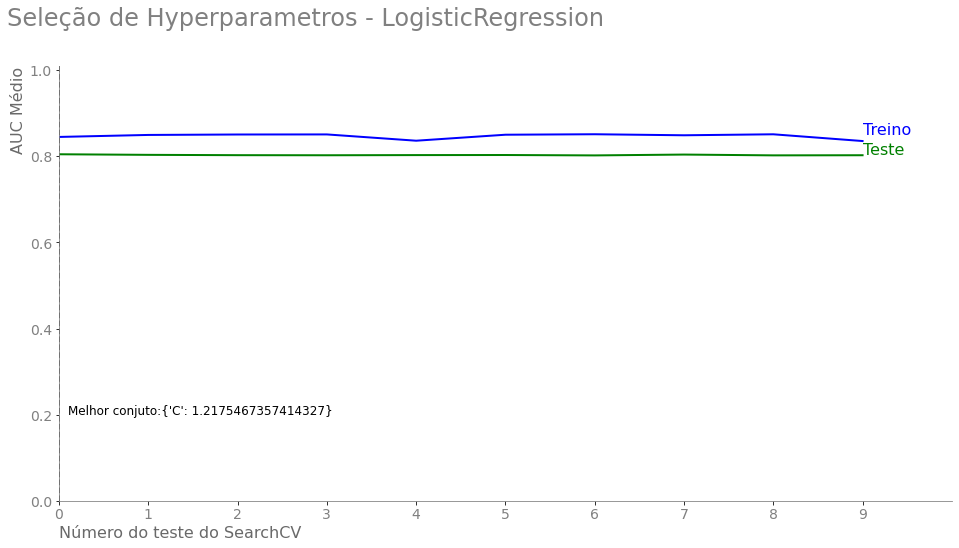

melhores hyperparametros : {'C': 1.2175467357414327}
Melhor modelo            : LogisticRegression(C=1.2175467357414327, max_iter=1000, tol=1e-06)


,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,{'C': 1.2175467357414327},0.804828,0.845076,0.046390,0.011106,0.028982,0.007385,0.005537,0.002164,1
1,{'C': 2.456649814509979},0.803469,0.849710,0.048046,0.011383,0.035598,0.005635,0.005097,0.001170,3
2,{'C': 2.9478088496923047},0.802718,0.850719,0.049174,0.011497,0.041554,0.009542,0.006136,0.002644,6
3,{'C': 3.0573371354577636},0.802515,0.850892,0.049331,0.011537,0.039056,0.007681,0.005098,0.001498,8
4,{'C': 0.519147839425572},0.802901,0.836306,0.044786,0.010619,0.020838,0.003463,0.005515,0.002435,5
5,{'C': 2.6829570907064726},0.803083,0.850216,0.048639,0.011437,0.035293,0.004796,0.005416,0.001612,4
6,{'C': 3.423750382319948},0.802170,0.851315,0.049535,0.011574,0.040690,0.007436,0.005516,0.001675,10
7,{'C': 2.0987409147362146},0.804118,0.848919,0.047404,0.011290,0.034410,0.004715,0.004857,0.000566,2
8,{'C': 3.3105404641134117},0.802272,0.851206,0.049256,0.011605,0.038791,0.004744,0.005237,0.001655,9
9,{'C': 0.49104712889788615},0.802576,0.835541,0.044676,0.010565,0.020079,0.002756,0.005349,0.001413,7


In [19]:
rng = RandomState(MT19937(SeedSequence(seed)))

parameters = hp.parameters_logistic_regression

modelo = LogisticRegression(max_iter=1000, tol=1e-6)

melhor_modelo_lr, res, melhor_metrica = treina(modelo = modelo,
                        x = x_cv, 
                        y = y_cv, 
                        parameters = parameters, 
                        n_splits = n_splits, 
                        n_repeats = n_repeats, 
                        n_iter = n_iter, 
                        n = 10,
                        rng=rng,
                        pasta_saida_fig='fig/',
                        f_save_fig=True)

melhores_metriacas_cv_por_modelo[obtem_nome_modelo(modelo)] =  melhor_metrica

res

---
## 4.3) Arvore de decissão

> Aqui será treinado do modelo **DecisionTreeClassifier**. No treino foi usado **RandomizedSearchCV** com **50** iterações. Os hyperparametros foram:
>* max_depth       : [1-20]
>* criterion       : [gini, entropy]
>* min_samples_leaf: [1-5]
>* max_leaf_nodes  : [2-5]


Fitting 50 folds for each of 10 candidates, totalling 500 fits


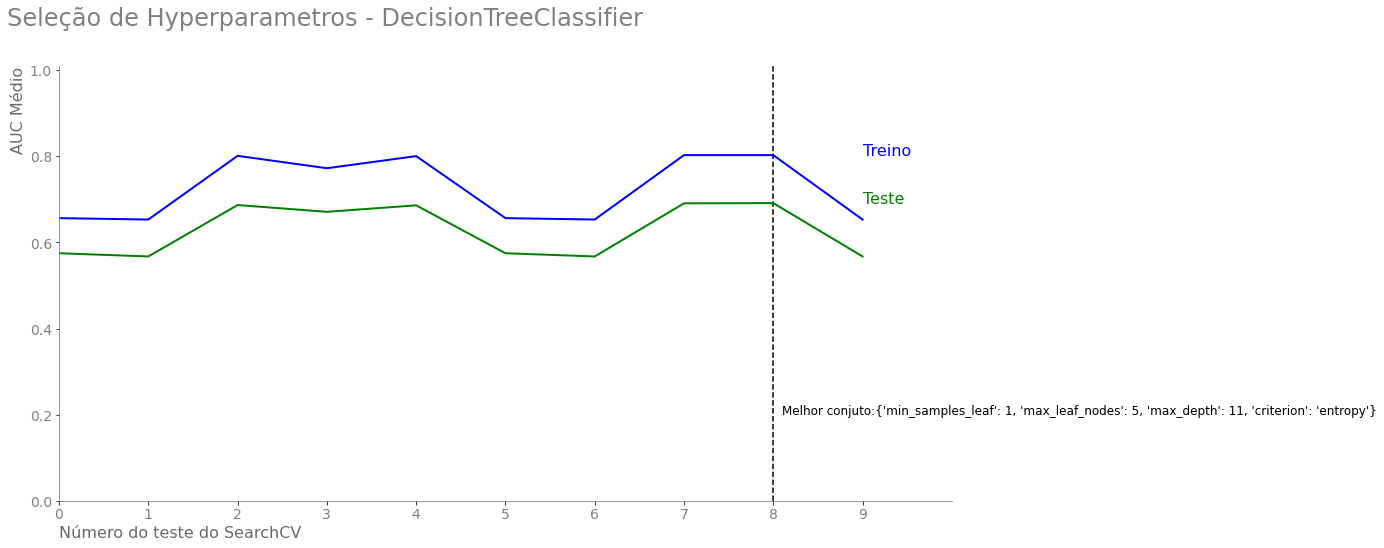

,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,"{'min_samples_leaf': 1, 'max_leaf_nodes': 2, '...",0.574949,0.656468,0.048746,0.018845,0.005538,0.003393,0.005575,0.002020,6
1,"{'min_samples_leaf': 4, 'max_leaf_nodes': 2, '...",0.567515,0.653220,0.049381,0.021841,0.005436,0.001971,0.004798,0.000800,8
2,"{'min_samples_leaf': 5, 'max_leaf_nodes': 5, '...",0.686907,0.801189,0.065879,0.013477,0.005728,0.001350,0.004577,0.000635,3
3,"{'min_samples_leaf': 1, 'max_leaf_nodes': 4, '...",0.671146,0.772406,0.058519,0.013636,0.005597,0.001077,0.005776,0.001734,5
4,"{'min_samples_leaf': 3, 'max_leaf_nodes': 5, '...",0.686207,0.800510,0.065034,0.013180,0.005196,0.000447,0.005328,0.001272,4
5,"{'min_samples_leaf': 1, 'max_leaf_nodes': 2, '...",0.574949,0.656468,0.048746,0.018845,0.004877,0.000840,0.005017,0.001737,6
6,"{'min_samples_leaf': 4, 'max_leaf_nodes': 2, '...",0.567515,0.653220,0.049381,0.021841,0.005288,0.001095,0.004837,0.000966,8
7,"{'min_samples_leaf': 4, 'max_leaf_nodes': 5, '...",0.690862,0.802814,0.057610,0.014056,0.006436,0.001471,0.005177,0.001071,2
8,"{'min_samples_leaf': 1, 'max_leaf_nodes': 5, '...",0.691379,0.802814,0.057426,0.014056,0.007195,0.002217,0.004897,0.001004,1
9,"{'min_samples_leaf': 4, 'max_leaf_nodes': 3, '...",0.567515,0.653220,0.049381,0.021841,0.004849,0.001358,0.004757,0.000814,8


melhores hyperparametros : {'min_samples_leaf': 1, 'max_leaf_nodes': 5, 'max_depth': 11, 'criterion': 'entropy'}
Melhor modelo            : DecisionTreeClassifier(criterion='entropy', max_depth=11, max_leaf_nodes=5)


In [20]:
rng = RandomState(MT19937(SeedSequence(seed)))

parameters = hp.parameters_decision_tree

modelo = DecisionTreeClassifier()

melhor_modelo_arvore, res, melhor_metrica = treina(modelo = modelo,
                            x = x_cv, 
                            y = y_cv, 
                            parameters = parameters, 
                            n_splits = n_splits, 
                            n_repeats = n_repeats, 
                            n_iter = n_iter, 
                            n = 10,
                            rng=rng,
                            pasta_saida_fig='fig/',
                            f_save_fig=True)

melhores_metriacas_cv_por_modelo[obtem_nome_modelo(modelo)] =  melhor_metrica

res

---
## 4.4) Forest Tree

> Aqui será treinado do modelo **Forest Tree**. No treino foi usado **RandomizedSearchCV** com **10** iterações. Os hyperparametros foram:
>* n_estimators    : [100, 150, 200, 250, 300, 350, 400]
>* max_depth       : [1, 20]    
>* criterion       : [gini, entropy]
>* min_samples_leaf: [1-5]
>* max_leaf_nodes  : [2-5]


Fitting 50 folds for each of 10 candidates, totalling 500 fits


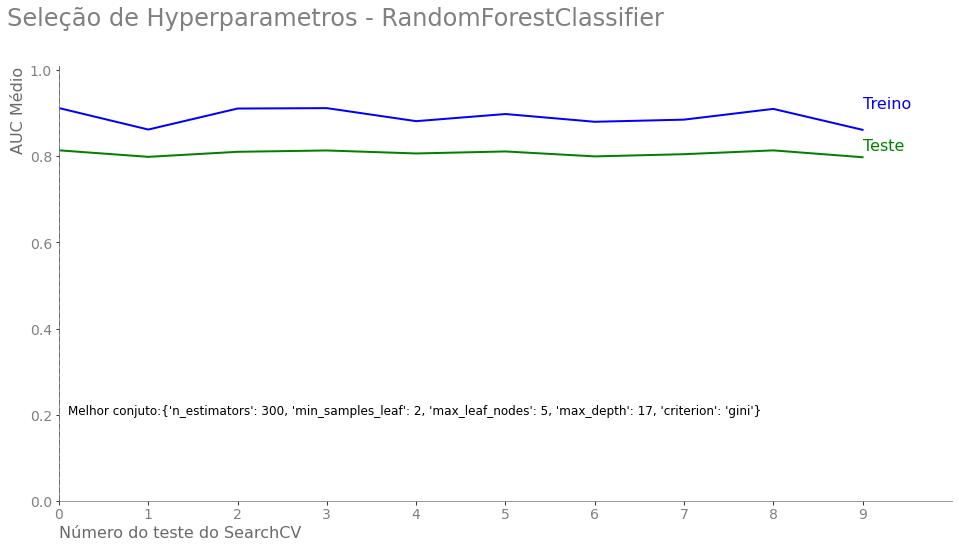

melhores hyperparametros : {'n_estimators': 300, 'min_samples_leaf': 2, 'max_leaf_nodes': 5, 'max_depth': 17, 'criterion': 'gini'}
Melhor modelo            : RandomForestClassifier(max_depth=17, max_leaf_nodes=5, min_samples_leaf=2,
                       n_estimators=300,
                       random_state=RandomState(MT19937) at 0x19C5DEC8D40)


,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,"{'n_estimators': 300, 'min_samples_leaf': 2, '...",0.813955,0.912118,0.055684,0.007775,0.783511,0.030840,0.066507,0.006415,1
1,"{'n_estimators': 250, 'min_samples_leaf': 2, '...",0.798844,0.862246,0.056338,0.010070,0.616790,0.022642,0.055961,0.005938,9
2,"{'n_estimators': 150, 'min_samples_leaf': 5, '...",0.810548,0.911046,0.057471,0.007925,0.411550,0.027276,0.036303,0.004079,5
3,"{'n_estimators': 400, 'min_samples_leaf': 2, '...",0.813631,0.911952,0.056464,0.007977,1.033227,0.032404,0.088464,0.011944,3
4,"{'n_estimators': 300, 'min_samples_leaf': 1, '...",0.806694,0.881690,0.055362,0.008810,0.769573,0.028413,0.066624,0.006313,6
5,"{'n_estimators': 350, 'min_samples_leaf': 2, '...",0.811359,0.898275,0.056598,0.008091,0.908249,0.046737,0.083383,0.014946,4
6,"{'n_estimators': 100, 'min_samples_leaf': 2, '...",0.799878,0.880285,0.058295,0.009623,0.266230,0.010064,0.026295,0.003385,8
7,"{'n_estimators': 250, 'min_samples_leaf': 3, '...",0.804990,0.885235,0.057166,0.008851,0.649514,0.026308,0.055926,0.006088,7
8,"{'n_estimators': 150, 'min_samples_leaf': 3, '...",0.813834,0.910222,0.057187,0.008346,0.394095,0.015966,0.036695,0.004875,2
9,"{'n_estimators': 200, 'min_samples_leaf': 3, '...",0.797951,0.861601,0.057513,0.009735,0.511706,0.029953,0.046102,0.005733,10


In [21]:
rng = RandomState(MT19937(SeedSequence(seed)))

parameters = hp.parameters_random_forest

modelo = RandomForestClassifier(random_state=rng)

melhor_modelo_forest, res, melhor_metrica = treina(modelo = modelo,
                            x = x_cv, 
                            y = y_cv, 
                            parameters = parameters, 
                            n_splits = n_splits, 
                            n_repeats = n_repeats, 
                            n_iter = n_iter, 
                            n = 10,
                            rng=rng,
                            pasta_saida_fig='fig/',
                            f_save_fig=True)

melhores_metriacas_cv_por_modelo[obtem_nome_modelo(modelo)] =  melhor_metrica

res

> 

## 4.5) Support Vector Classification.

> Aqui será treinado do modelo **SVC**. No treino foi usado **RandomizedSearchCV** com **50** iterações. Os hyperparametros de busca foram
>* kernel        : [linear, poly, rbf, sigmoid]
>* C             : [0, 2]
>* gamma         : [scale, auto]
>* shrinking     : [True , False]

Fitting 50 folds for each of 10 candidates, totalling 500 fits


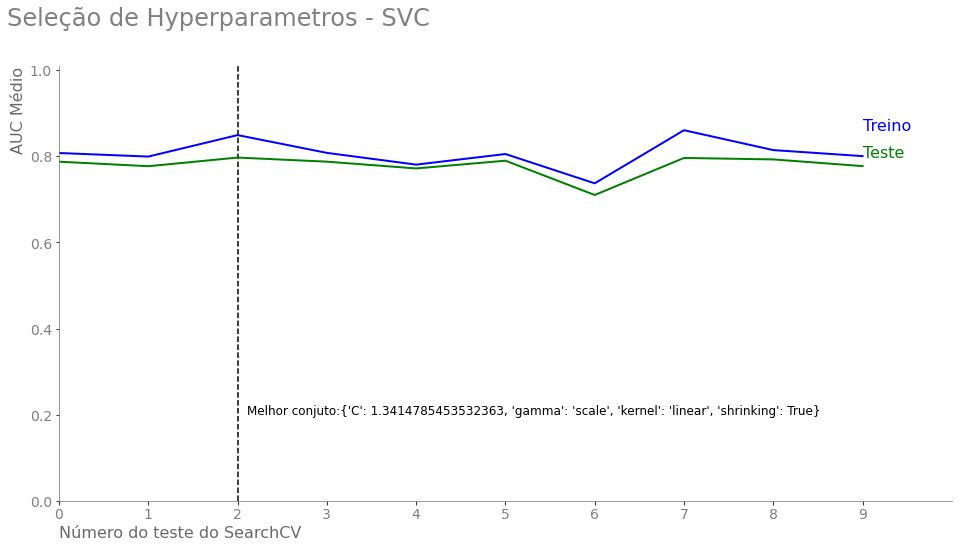

melhores hyperparametros : {'C': 1.3414785453532363, 'gamma': 'scale', 'kernel': 'linear', 'shrinking': True}
Melhor modelo            : SVC(C=1.3414785453532363, kernel='linear', probability=True)


,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,"{'C': 0.6087733678707163, 'gamma': 'auto', 'ke...",0.787566,0.807726,0.058410,0.013620,0.042156,0.005682,0.009441,0.005959,6
1,"{'C': 1.1919973308493834, 'gamma': 'auto', 'ke...",0.777079,0.799462,0.061350,0.013530,0.034853,0.005281,0.006536,0.001745,8
2,"{'C': 1.3414785453532363, 'gamma': 'scale', 'k...",0.797140,0.849337,0.056291,0.012555,0.027926,0.011902,0.006836,0.002411,1
3,"{'C': 0.6182682488506304, 'gamma': 'auto', 'ke...",0.787627,0.808040,0.058298,0.013616,0.040513,0.004011,0.008622,0.002534,5
4,"{'C': 0.09161178303222162, 'gamma': 'auto', 'k...",0.771927,0.780759,0.059229,0.012761,0.037314,0.004217,0.006936,0.002138,9
5,"{'C': 1.067968630753091, 'gamma': 'auto', 'ker...",0.789899,0.805387,0.057984,0.013313,0.029102,0.004007,0.006696,0.001971,4
6,"{'C': 1.537307483968221, 'gamma': 'scale', 'ke...",0.710264,0.737321,0.066787,0.017643,0.042653,0.004729,0.006897,0.001062,10
7,"{'C': 1.8286516557652102, 'gamma': 'scale', 'k...",0.796268,0.860690,0.052345,0.010714,0.037225,0.003778,0.007915,0.001706,2
8,"{'C': 1.9473655752001813, 'gamma': 'auto', 'ke...",0.792840,0.814512,0.057342,0.013163,0.026115,0.001823,0.006309,0.001943,3
9,"{'C': 1.264838942734859, 'gamma': 'auto', 'ker...",0.777343,0.800532,0.061001,0.013632,0.034879,0.004933,0.006960,0.001616,7


In [22]:
rng = RandomState(MT19937(SeedSequence(seed)))

parameters = hp.parameters_svc

modelo = SVC(probability=True)

melhor_modelo_svc, res, melhor_metrica = treina(modelo = modelo,
                            x = x_cv, 
                            y = y_cv, 
                            parameters = parameters, 
                            n_splits = n_splits, 
                            n_repeats = n_repeats, 
                            n_iter = n_iter, 
                            n = 10,
                            rng=rng,
                            pasta_saida_fig='fig/',
                            f_save_fig=True)

melhores_metriacas_cv_por_modelo[obtem_nome_modelo(modelo)] =  melhor_metrica

res

## 4.5) KNeighbors

> Aqui será treinado do modelo **KNeighbor**. No treino foi usado **RandomizedSearchCV** com **50** iterações. Os hyperparametros de busca foram
>* n_neighbors   : [1, 10]
>* p             : [1, 2]
>* weights       : [uniform, distance]
>* algorithm     : [auto, ball_tree, kd_tree, brute]

Fitting 50 folds for each of 10 candidates, totalling 500 fits


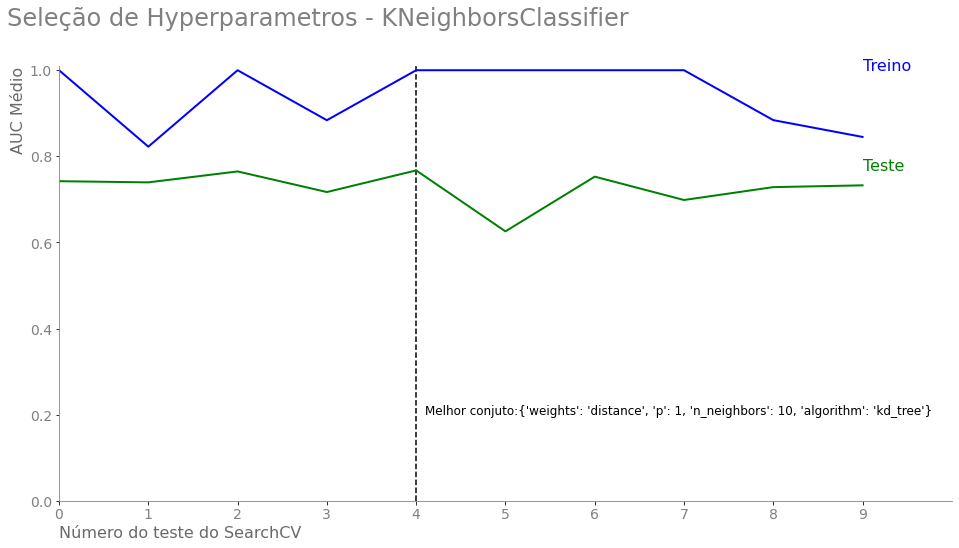

melhores hyperparametros : {'weights': 'distance', 'p': 1, 'n_neighbors': 10, 'algorithm': 'kd_tree'}
Melhor modelo            : KNeighborsClassifier(algorithm='kd_tree', n_neighbors=10, p=1,
                     weights='distance')


,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.742292,1.000000,0.057401,0.000000,0.005557,0.002136,0.007649,0.001705,4
1,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.739544,0.822480,0.056212,0.014317,0.005916,0.001682,0.007571,0.001920,5
2,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.764959,1.000000,0.056732,0.000000,0.004298,0.001359,0.006892,0.001988,2
3,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ...",0.717089,0.883898,0.053886,0.010729,0.004657,0.001595,0.006566,0.001864,8
4,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.767333,1.000000,0.058194,0.000000,0.005664,0.001127,0.007535,0.001512,1
5,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.625761,1.000000,0.048491,0.000000,0.005161,0.001346,0.006995,0.002314,10
6,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.752860,1.000000,0.055230,0.000000,0.004323,0.001433,0.006756,0.001954,3
7,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.698611,1.000000,0.044291,0.000000,0.004457,0.001043,0.006856,0.002058,9
8,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.728499,0.884125,0.057200,0.009612,0.006656,0.003811,0.008407,0.006252,7
9,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.732637,0.845056,0.059193,0.013221,0.004517,0.001961,0.006296,0.001299,6


In [23]:
rng = RandomState(MT19937(SeedSequence(seed)))

parameters = hp.parameters_KNeighbors

modelo = KNeighborsClassifier()

melhor_modelo_kn, res, melhor_metrica = treina(modelo = modelo,
                            x = x_cv, 
                            y = y_cv, 
                            parameters = parameters, 
                            n_splits = n_splits, 
                            n_repeats = n_repeats, 
                            n_iter = n_iter, 
                            n = 10,
                            rng=rng,
                            pasta_saida_fig='fig/',
                            f_save_fig=True)

melhores_metriacas_cv_por_modelo[obtem_nome_modelo(modelo)] =  melhor_metrica

res

# 5) Avaliando o melhor modelo

> Agora vamos avaliar o melhor modelo encontrado utilizando o dados de validação.

In [24]:
modelos = [melhor_modelo_dummy, 
           melhor_modelo_lr, 
           melhor_modelo_arvore, 
           melhor_modelo_forest, 
           melhor_modelo_svc,
           melhor_modelo_kn] 

In [25]:
desempenho_dos_modelos(modelos, x_val, y_val)

,Name,tn,fp,fn,tp,AUC
0,RandomForestClassifier,13,6,6,11,0.835913
1,KNeighborsClassifier,16,3,6,11,0.763158
2,DecisionTreeClassifier,9,10,2,15,0.736842
3,LogisticRegression,14,5,7,10,0.718266
4,SVC,13,6,9,8,0.684211
5,DummyClassifier,10,9,7,10,0.577399


In [26]:
desempenho_cv_por_modelo = pd.DataFrame(melhores_metriacas_cv_por_modelo).T.sort_values('media', ascending=False)
desempenho_cv_por_modelo

,media,std
RandomForestClassifier,0.813955,0.055684
LogisticRegression,0.804828,0.046390
SVC,0.797140,0.056291
KNeighborsClassifier,0.767333,0.058194
DecisionTreeClassifier,0.691379,0.057426


> DataFrame com os resultados

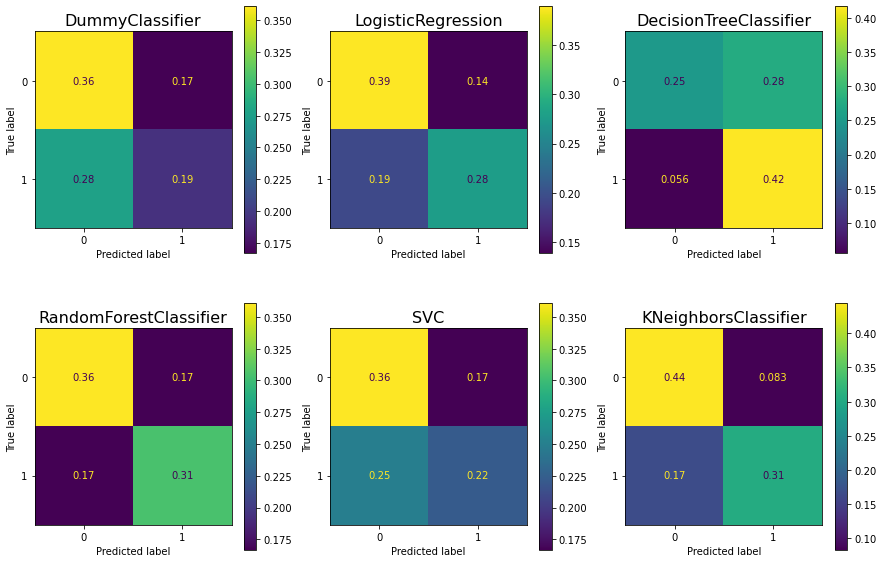

In [27]:
plota_matriz_de_confusao(modelos, x_val, y_val)

> A Matriz de confusão dos modelos. Os paramentro mais crítico para o nosso modelo é o **falso negativo** (FN).

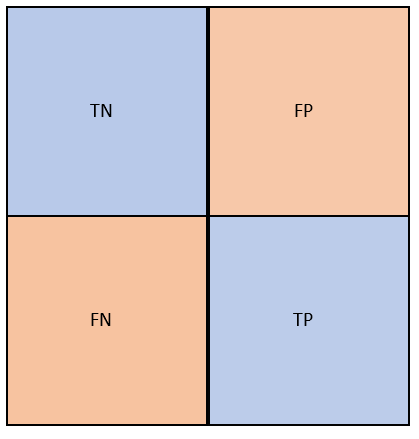

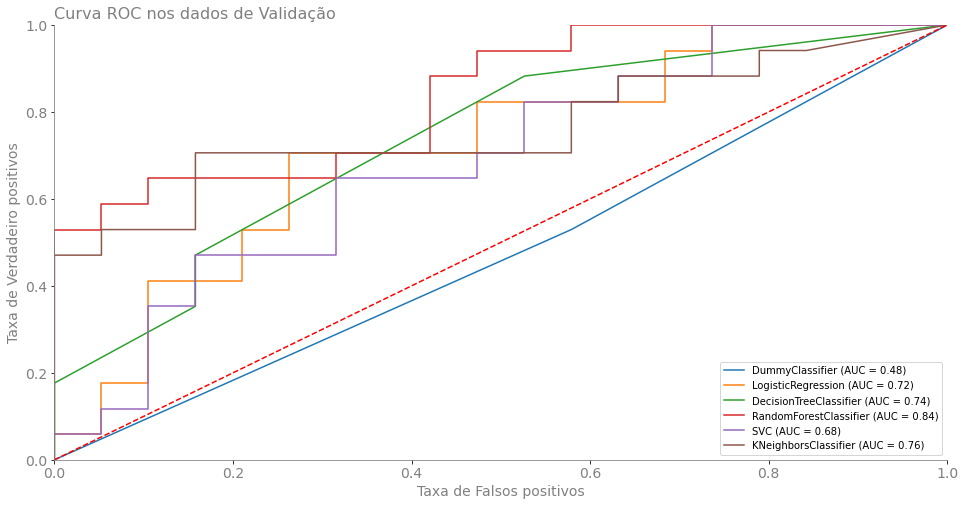

In [28]:
plota_curva_roc(modelos, titulo='Curva ROC nos dados de Validação', x=x_val, y=y_val)

> A curva ROC dos modelos para os dados de validação. No gráfico observa-se que DummyClassifier estão na diagonal do gráfico como esperado

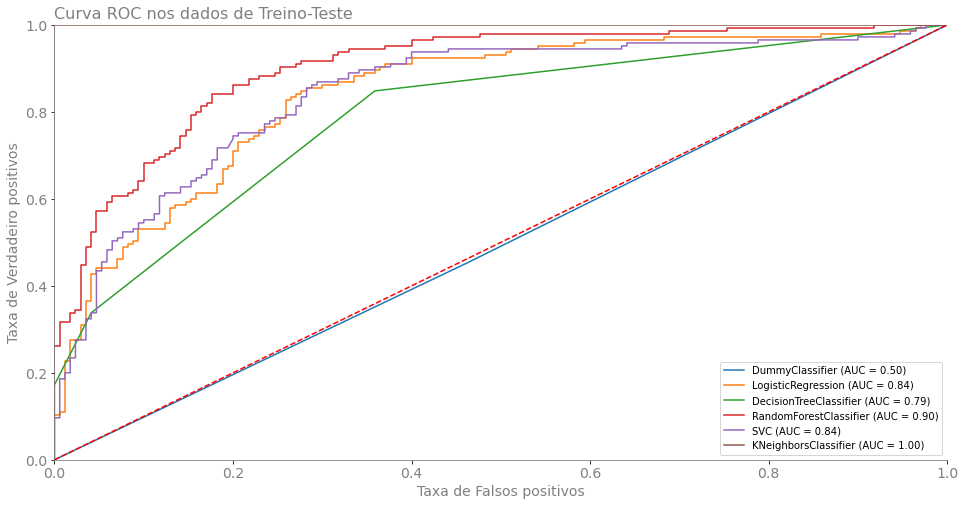

In [29]:
plota_curva_roc(modelos, titulo='Curva ROC nos dados de Treino-Teste', x=x_cv, y=y_cv)

> A curva ROC dos modelos para os dados usados na **Cross Validation** (teste+treino). Este gráfico não pode ser usado para avaliar o modelo pois o modelo final foi re-treina com todos os dados da **Cross Validation** depois que o melhor hyperparametro foi achado.  

# 6) Conclusão